# Clusterizace

Také se nazývá shluková analýza, v angličtině clustering. Slouží k roztřídění dat, o kterých nepotřebujeme znát jejich význam, vytváří skupiny (shluky objektů / clustery) na základě podobnosti - aby si prvky skupiny byli navzájem podobní, ale nebyli příliš podobní s prvky mimo tutu skupinu.

## Použití

Umožňuje řešit typ problému, který se vyskytuje v mnoha oblastech, například data mining, marketing, biologie, medicína, analýza obrazu, počítačová grafika, machine learning a další.

### Kdy použít clusterizaci a kdy klasifikaci
Obě metody se využívají pro rozdělení do skupin na základě vlastností prvků, takže jsou si celkem podobné, ale mají jisté rozdíly, které určují jejich využití.

| Parametr | Klasifikace | Clusterizace |
| --- | --- | --- |
| učení | s učitelem (trénovací data) | bez učitele |
| použití | rozdělení do předem definovaných tříd | rozdělení do clusterů na základě podobnosti, "neznáme" význam tříd |
| komplexnost | složitější než clusterizace | méně složitá než klasifikace |

Klasifikace vyžaduje učení s učitelem, takže je třeba mít nějaká data obsahující třídy, do kterých jsou roztříděny.

Clusterizaci použijeme v případě, že hledáme nějakou novou, dosud neznámou informaci, předem neznáme výstup. Například rozdělení diváků seriálů do clusterů podle toho, na co se dívali, pro doporučení dalších pořadů (Netflix).

### Použité knihovny
##### NumPy
- Práce s maticemi
- https://numpy.org/doc/stable/index.html

##### matplotlib
- Práce s grafy
- https://matplotlib.org/

##### skicit-learn 
- Nástroje pro machine learning
- https://scikit-learn.org/stable/index.html

##### SciPy
- Nástroje pro různé matematické a vědecké operace
- Obsahuje i základní algoritmy pro clusterizaci
- https://www.scipy.org/scipylib/index.html

## Algoritmy



### Hierarchické
Rozdělení do hierarchické struktury clusterů. Může být přístup **bottom-up**, kde se jednotlivé datové prvky spojují do clusterů, nebo **top-down**, kde na začátku máme velký cluster, který postupně rozdělujeme na menší clustery. 



*postup:*
    1. Každý prvek se přiřadí do samostatného clusteru. Tedy na začátku bude stejný počet clusterů jako je datových prvků.
    2. Najde se nebližší (nejpodobnější) dvojice clusterů, které se spojí do společného clusteru. Tedy se sníží počet clusterů o jedna. Tento krok opakujeme, dokud není pouze jeden cluster.

Omezující podmínkou může být počet clusterů nebo maximální vzdálenost.

Pro hierarchické algoritmy jsou typické dendrogramy znázorňující jednotlivé kroky.

Základní algoritmy mají časovou složitost O(n^3), což není moc dobré, především pro velké datové sady.

Vzdálenost clusterů je určena metrikou (linkage metrics), kde nejběžnější je **Single-linkage**, která určuje vzdálenost clusterů na základě 2 nejbližších prvků jednotlivých clusterů. Další metrikou je **Complete-linkage**, která určuje vzdálenost clusterů jako vzdálenost jejich nejvzdálenějších prvků. Třetí možností je **Average-linkage**, která rozhoduje na základě průměru clusterů.
<img src="resources/linkage.png">
(https://www.researchgate.net/figure/The-three-linkage-types-of-hierarchical-clustering-single-link-complete-link-and_fig57_281014334)

#### Jednoduchý Příklad
(https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)
Importy

In [52]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

- Vytvoření bodů a jejich vykreslení v grafu

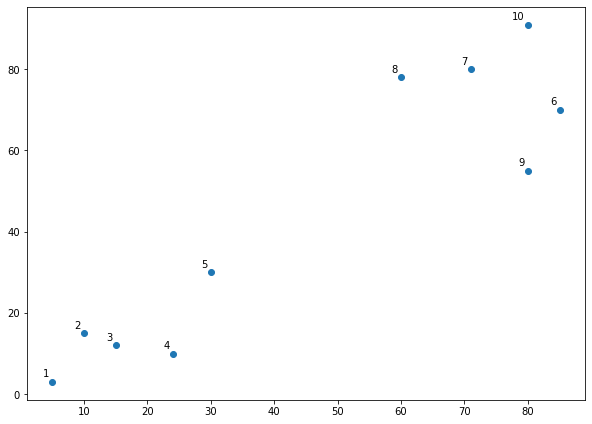

In [56]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [80,55],
    [80,91],])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

- Hierarchické clusterování bottom-up na základě **Euklidovké vzdálenosti**
- Vykreslení dendrogramu, kde můžeme vidět pořadí vytváření clusterů. Hodnota na vertikální ose udává vzdálenost

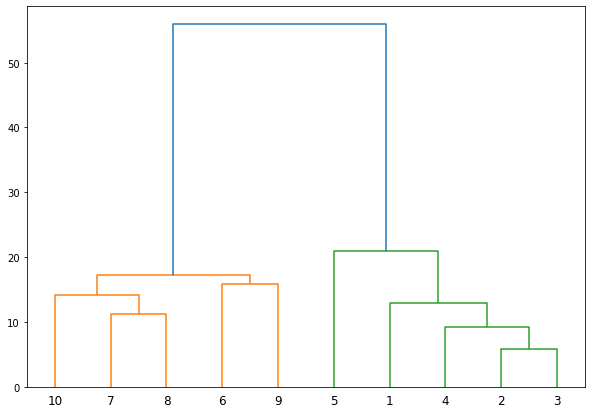

In [57]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

- Použití knihovny skicit-learn pro hierarchické clusterování
- Výsledkem jsou opět 2 clustery

[1 1 1 1 1 0 0 0 0 0]


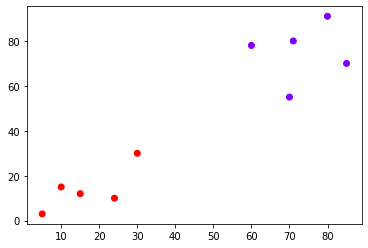

In [50]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

### Nehierarchické
Netvoří se stromová struktura mezi jednotlivými clustery. Nehierarchické algoritmy jsou všeobecně rychlejší než hierarchické, což je důležité především u velkých datových sad.

## Algoritmy

### k-means
Nejběžnější nehierarchický algoritmus, iterativně formuje clustery. Počet clusterů (k) musí být předem známý.

*postup:*
    1. Náhodně se zvolí k vzorků dat, které tvoří středy clusterů, tzv. centroidy
    2. Přiřadí se každý ze vzorků do clusteru nejbližšího centroidu
    3. Vypočítá se střed každého clusteru pomocí průměru a centroidy se umístí do těchto bodů
    4. Kroky 2 a 3 opakujeme dokud se centroidy nepřestanou měnit


In [1]:
# výpis na konzoli
print("ŽÁDNÉ středníky;")
print("ŽÁDNÉ { složené závorky }")

ŽÁDNÉ středníky;
ŽÁDNÉ { složené závorky }


Vypsání více hodnot na jeden řádek

In [2]:
print(1, 2, 3)

1 2 3


### Příklady implicitního vypisování

In [3]:
10 + 20

30

In [4]:
"slon"

'slon'

## Proměnné
Symbolické jméno uchovávající určitou informaci.
- Stačí jen zadat jméno a přiřadit hodnotu
- Není potřeba deklarovat předem ani určovat typ 
- Nelze deklarovat proměnou bez přiřazení hodnoty
- Jednou definovaná proměnná v rámci skriptu stále uchovává stejnou hodnotu

In [ ]:
moje_oblibene_cislo = 42

#### Příklady:

In [ ]:
a = 2
print(a)

In [ ]:
b = 3.14
print(b)

In [ ]:
c = 'A'
print(c)

In [ ]:
d = "A"
print(d)

In [ ]:
a

In [ ]:
a = 10
print(a)

In [ ]:
a

## Vstup z konsole (`input()`)
Opakem příkazu `print()`, který zajišťuje výstup je `input()` pro vstup.

In [ ]:
a = input()
print(a)


Input se vstupní hláškou

In [ ]:
a = input("Strana: ")
print(a)

## Pravidla pro pojmenování proměnných
*[PEP8](https://www.python.org/dev/peps/pep-0008/) – Style Guide for Python Code*

Proměnné musí začínat písmenem či podtržítkem

Proměnné jsou *case sensitive*

In [ ]:
cislo = 1
Cislo = 2
číslo = 3
print(cislo, Cislo, číslo)

Pro více-slovné proměnné používáme jako oddělovač podtržítko `_`

In [ ]:
moje_oblibene_cislo = 42
print(moje_oblibene_cislo)

Další ukázky

In [ ]:
x = 10
print(x)

In [ ]:
_y = 20
$y = 50
9x = 30
print(_y)
print($y)
print(9x)


## Operátory přiřazení

Základní přiražení

In [ ]:
a = 1
b = a + 1
print(b)

Vícenásobné přiřazeni

In [ ]:
a, b, c = 1, 2, 3
print(a, b, c)

Prohození dvou proměných díky přiřazeni

In [ ]:
a = 1
b = 2
a, b = b, a
print(a, b)

> #### Příklad:
> Do proměnných `a,b,c` přiřaďte hodnoty `ahoj, 10, 20.23` a následně je vypište.

In [ ]:
# Řešení

### Operátor přiřazení kombinovavý s operací
Operátory přiřazení lze zkombinovat s operací, tedy zápis:
- `a = a + 1`
Je stejný jako zápis:
- `a += 1`

In [ ]:
a = 1
b = 1
a = a + 1
b += 1
print(a, b)

Takto se dají kombinovat i další binární operátory.

## Rezervovaná slova
Jedná se o slova, která nelze použít pro názvy proměnných.

`and `
`exec `
`not`
`assert`
`finally`
`or`
`break`
`for`
`pass`
`class`
`from`
`print`
`continue`
`lambda`
`yield`
`global`
`raise`
`def`
`if`
`return`
`del`
`import`
`try`
`elif`
`in`
`while`
`else`
`is`
`with `
`except`

## Konce řádků a středníky
Z mnoha programovacích jazyků jsme zvyklí ukončovat příkazy středníky.
To má velkou výhodu v tom, že když chceme napsat příkaz na více řádků, ničemu to nevadí.

V Pythonu platí co řádek to příkaz.
Když chceme napsat příkaz na více řádků, použijeme znak `\`.

In [ ]:
"Ahoj" +\
" " +\
"svetě."

## Import funkci, objeku, modulu
Pokud chceme použit něco, co není soušátí standatního balíčku, pak musíme provést import.

Například python nezná konstantu `pi`, ta je v modulu `math`.

In [ ]:
import math
math.pi

pokud bychom chtěli pouze `pi`

In [1]:
from math import pi
pi

3.141592653589793